<img src="img/decisionmaking.png" width="400">

<p style="font-size:35px">ELEC-E7890 - User Research<br></p>
<p style="font-size:30px">Lecture 4 - Data Visualization</p>

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Learning objectives</h2>
</div>

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
</div>

<div class="alert alert-block alert-info">
 </div>

#### Setup Python environment <a class="tocSkip"></a>

In [25]:
# Import the libraries
import pandas as pd
import numpy as np

import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import scipy.stats as stats
import string  # For adding letters in the figures
import scipy.special as sps  # For gamma function
from statsmodels.formula.api import ols # For regression analysis
from statsmodels.stats.anova import anova_lm # For ANOVA

%config InlineBackend.figure_format='retina' # For not burning your eyes
sns.set_theme(style="white")
np.set_printoptions(threshold=8) # Don't print to much elements when printing arrays 

# Before anything else: (it's obvious) visualize your data

Case adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>),
itself adapted from 
    <a href="https://archive.nytimes.com/www.nytimes.com/imagepages/2007/07/29/health/29cancer.graph.web.html">The New York Times</a>.

In [26]:
diseases   = ["Kidney Cancer", "Bladder Cancer", "Esophageal Cancer",
              "Ovarian Cancer", "Liver Cancer", "Non-Hodgkin's\nlymphoma",
              "Leukemia", "Prostate Cancer", "Pancreatic Cancer",
              "Breast Cancer", "Colorectal Cancer", "Lung Cancer"]
men_deaths = [10000, 12000, 13000, 0, 14000, 12000,
              16000, 25000, 20000, 500, 25000, 80000]
men_cases = [30000, 50000, 13000, 0, 16000, 30000,
             25000, 220000, 22000, 600, 55000, 115000]
women_deaths = [6000, 5500, 5000, 20000, 9000, 12000,
                13000, 0, 19000, 40000, 30000, 70000]
women_cases = [20000, 18000, 5000, 25000, 9000, 29000,
               24000, 0, 21000, 160000, 55000, 97000]

df = pd.DataFrame(dict(
    diseases=diseases, men_deaths=men_deaths, men_cases=men_cases,
    women_deaths=women_deaths, women_cases=women_cases))
df

,diseases,men_deaths,men_cases,women_deaths,women_cases
0,Kidney Cancer,10000,30000,6000,20000
1,Bladder Cancer,12000,50000,5500,18000
2,Esophageal Cancer,13000,13000,5000,5000
3,Ovarian Cancer,0,0,20000,25000
4,Liver Cancer,14000,16000,9000,9000
5,Non-Hodgkin's\nlymphoma,12000,30000,12000,29000
6,Leukemia,16000,25000,13000,24000
7,Prostate Cancer,25000,220000,0,0
8,Pancreatic Cancer,20000,22000,19000,21000
9,Breast Cancer,500,600,40000,160000


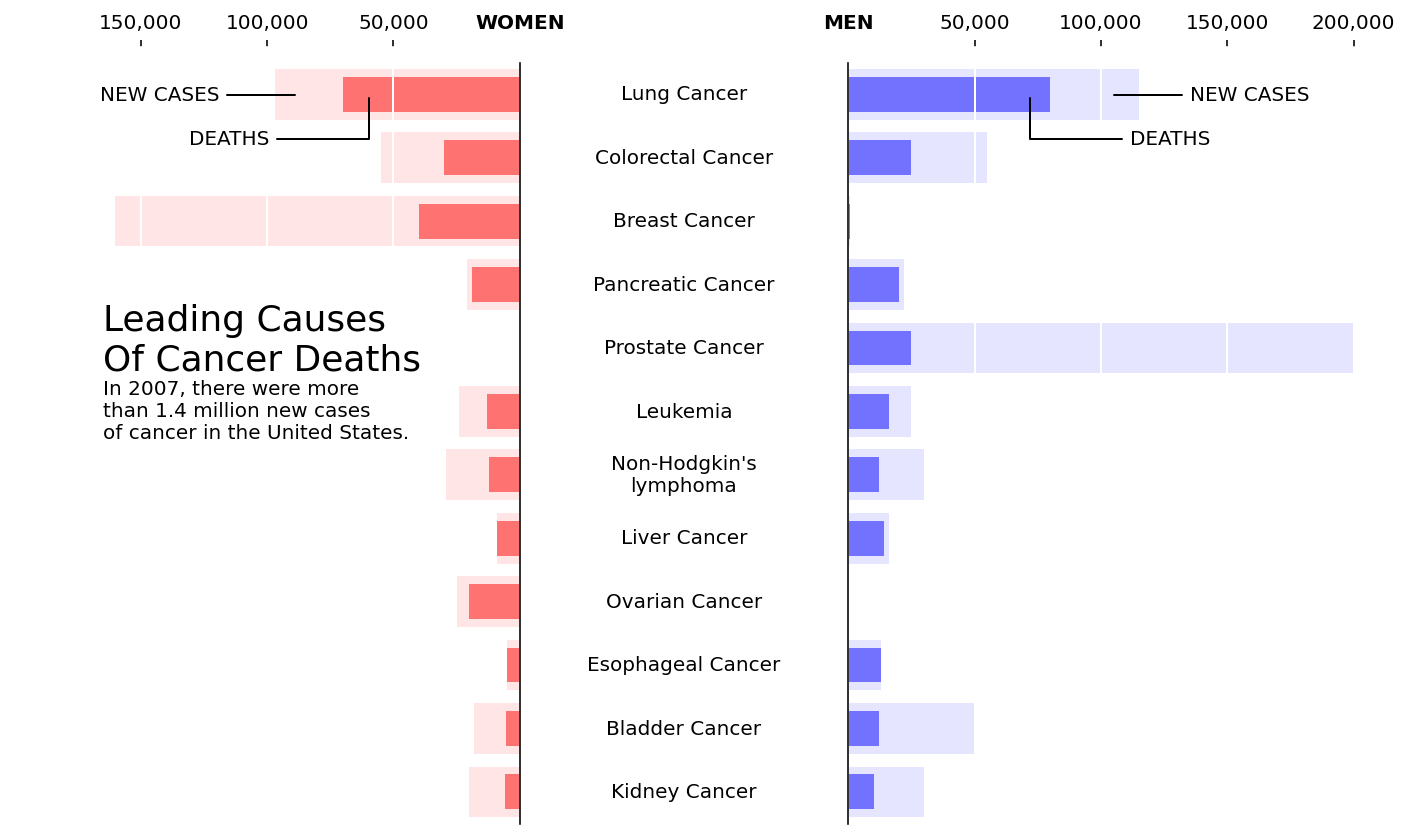

In [30]:
# Reset default settings
sns.reset_orig()

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure.subplot', wspace=.65)
matplotlib.rc('grid', color='white')
matplotlib.rc('grid', linewidth=1)

# Make figure background the same colors as axes
fig = plt.figure(figsize=(12,7), facecolor='white')

# ---WOMEN data ---
axes_left  = plt.subplot(121)

# Keep only top and right spines
axes_left.spines['left'].set_color('none')
axes_left.spines['right'].set_zorder(10)
axes_left.spines['bottom'].set_color('none')
axes_left.xaxis.set_ticks_position('top')
axes_left.yaxis.set_ticks_position('right')
axes_left.spines['top'].set_position(('data',len(diseases)+.25))
axes_left.spines['top'].set_color('w')

# Set axes limits
plt.xlim(200000,0)
plt.ylim(0,len(diseases))

# Set ticks labels
plt.xticks([150000, 100000, 50000, 0],
           ['150,000', '100,000', '50,000', 'WOMEN'])
axes_left.get_xticklabels()[-1].set_weight('bold')
axes_left.get_xticklines()[-1].set_markeredgewidth(0)
for label in axes_left.get_xticklabels():
    label.set_fontsize(10)
plt.yticks([])



# Plot data
for i in range(len(women_deaths)):
    H,h = 0.8, 0.55
    # Death
    value = women_cases[i]
    p = patches.Rectangle(
        (0, i+(1-H)/2.0), value, H, fill=True, transform=axes_left.transData,
        lw=0, facecolor='red', alpha=0.1)
    axes_left.add_patch(p)
    # New cases
    value = women_deaths[i]
    p = patches.Rectangle(
        (0, i+(1-h)/2.0), value, h, fill=True, transform=axes_left.transData,
        lw=0, facecolor='red', alpha=0.5)
    axes_left.add_patch(p)

# Add a grid
axes_left.grid()

plt.text(165000,8.2,"Leading Causes\nOf Cancer Deaths", fontsize=18,va="top")
plt.text(165000,7,"""In 2007, there were more\n"""
                  """than 1.4 million new cases\n"""
                  """of cancer in the United States.""", va="top", fontsize=10)

# --- MEN data ---
axes_right = plt.subplot(122, sharey=axes_left)

# Keep only top and left spines
axes_right.spines['right'].set_color('none')
axes_right.spines['left'].set_zorder(10)
axes_right.spines['bottom'].set_color('none')
axes_right.xaxis.set_ticks_position('top')
axes_right.yaxis.set_ticks_position('left')
axes_right.spines['top'].set_position(('data',len(diseases)+.25))
axes_right.spines['top'].set_color('w')


# Set axes limits
plt.xlim(0,200000)
plt.ylim(0,len(diseases))

# Set ticks labels
plt.xticks([0, 50000, 100000, 150000, 200000],
           ['MEN', '50,000', '100,000', '150,000', '200,000'])
axes_right.get_xticklabels()[0].set_weight('bold')
for label in axes_right.get_xticklabels():
    label.set_fontsize(10)
axes_right.get_xticklines()[1].set_markeredgewidth(0)
plt.yticks([])

# Plot data
for i in range(len(men_deaths)):
    H,h = 0.8, 0.55
    # Death
    value = men_cases[i]
    p = patches.Rectangle(
        (0, i+(1-H)/2.0), value, H, fill=True, transform=axes_right.transData,
        lw=0, facecolor='blue', alpha=0.1)
    axes_right.add_patch(p)
    # New cases
    value = men_deaths[i]
    p = patches.Rectangle(
        (0, i+(1-h)/2.0), value, h, fill=True, transform=axes_right.transData,
        lw=0, facecolor='blue', alpha=0.5)
    axes_right.add_patch(p)

# Add a grid
axes_right.grid()

# Y axis labels
# We want them to be exactly in the middle of the two y spines
# and it requires some computations
for i in range(len(diseases)):
    x1,y1 = axes_left.transData.transform_point( (0,i+.5))
    x2,y2 = axes_right.transData.transform_point((0,i+.5))
    x,y = fig.transFigure.inverted().transform_point( ((x1+x2)/2,y1) )
    plt.text(x, y, diseases[i], transform=fig.transFigure, fontsize=10,
             horizontalalignment='center', verticalalignment='center')


# Devil hides in the details...
arrowprops = dict(arrowstyle="-",
                  connectionstyle="angle,angleA=0,angleB=90,rad=0")
x = women_cases[-1]
axes_left.annotate('NEW CASES', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='right', fontsize= 10,
                   xytext=(-40, -3), textcoords='offset points',
                   arrowprops=arrowprops)

x = women_deaths[-1]
axes_left.annotate('DEATHS', xy=(.85*x, 11.5),  xycoords='data',
                   horizontalalignment='right', fontsize= 10,
                   xytext=(-50, -25), textcoords='offset points',
                   arrowprops=arrowprops)

x = men_cases[-1]
axes_right.annotate('NEW CASES', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+40, -3), textcoords='offset points',
                   arrowprops=arrowprops)

x = men_deaths[-1]
axes_right.annotate('DEATHS', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+50, -25), textcoords='offset points',
                   arrowprops=arrowprops)


# Done
plt.savefig('figure-1.pdf')
plt.show()

<div class="alert alert-block alert-info">
 Compare what the information that can understand based on the table, and based on the figure!
</div>

In [32]:
df

,diseases,men_deaths,men_cases,women_deaths,women_cases
0,Kidney Cancer,10000,30000,6000,20000
1,Bladder Cancer,12000,50000,5500,18000
2,Esophageal Cancer,13000,13000,5000,5000
3,Ovarian Cancer,0,0,20000,25000
4,Liver Cancer,14000,16000,9000,9000
5,Non-Hodgkin's\nlymphoma,12000,30000,12000,29000
6,Leukemia,16000,25000,13000,24000
7,Prostate Cancer,25000,220000,0,0
8,Pancreatic Cancer,20000,22000,19000,21000
9,Breast Cancer,500,600,40000,160000


<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
    
Always visualize your data! A series of number is poorly informative in itself.
</div>

# Do NOT burn steps

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>

Always start by visualizing (as much as possible) individual observations first 
</div>

## Remember the dinosaur <a class="tocSkip"></a>

#### Dataset 1 <a class="tocSkip"></a>

Let's load the data from `circle-data.csv`

##### Load data <a class="tocSkip"></a>

In [3]:
# Load the data
df = pd.read_csv(
    os.path.join("data", "circle-data.csv"),
    index_col=[0])

# Print the top of the file
df

,x,y
0,53.500480,82.351329
1,50.629577,84.715953
2,49.932717,79.284252
3,48.788095,81.244959
4,49.496214,78.992123
...,...,...
137,39.580304,21.216219
138,85.303704,41.078480
139,51.310546,84.395317
140,50.594653,81.292113


You could be tempted to begin to compute descriptive statistics such as mean instead of looking to your data...

In [4]:
# For both variables
for var in "x", "y":
    
    # Compute the mean and variance and print the result showing only 2 digits after the comma
    print(f"Mean '{var}': {np.mean(df[var]):.2f} +/- {np.std(df[var]):.2f} STD")

Mean 'x': 54.27 +/- 16.70 STD
Mean 'y': 47.83 +/- 26.84 STD


And still without looking at the raw data, let's do a barplot:

##### Visualize with a simple bareplot <a class="tocSkip"></a>

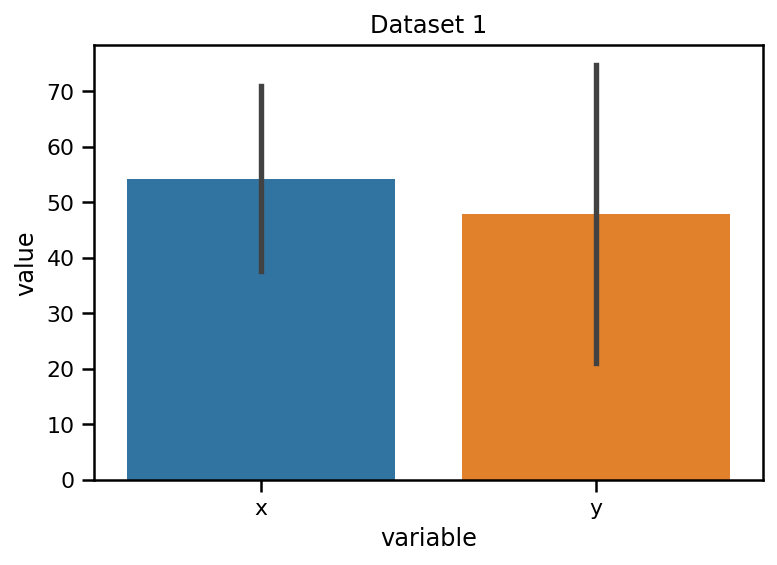

In [5]:
# Let's flip the dataframe (inverse row and columns)
df_flipped = df.melt()
# Do a barplot
sns.barplot(x="variable", y="value", data=df_flipped, ci="sd")
plt.title("Dataset 1")
plt.show()

#### Dataset 2 <a class="tocSkip"></a>

Let's consider a second dataset...

Let's load the data from `dino-data.csv`

##### Load data <a class="tocSkip"></a>

In [6]:
# Load the data
df_other = pd.read_csv(
    os.path.join("data", "dino-data.csv"),
    index_col=[0])

# Look at the top of the file
df_other

,x,y
0,55.384600,97.179500
1,51.538500,96.025600
2,46.153800,94.487200
3,42.820500,91.410300
4,40.769200,88.333300
...,...,...
137,39.487200,25.384600
138,91.282100,41.538500
139,50.000000,95.769200
140,47.948700,95.000000


In [7]:
# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the original dataset
    print(f"Dataset 1 - Mean '{var}': {np.mean(df[var]):.1f} +/- {np.std(df[var]):.2f} STD")
print()

# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the second dataset
    print(f"Dataset 2 - Mean '{var}': {np.mean(df_other[var]):.1f} +/- {np.std(df_other[var]):.2f} STD")

Dataset 1 - Mean 'x': 54.3 +/- 16.70 STD
Dataset 1 - Mean 'y': 47.8 +/- 26.84 STD

Dataset 2 - Mean 'x': 54.3 +/- 16.71 STD
Dataset 2 - Mean 'y': 47.8 +/- 26.84 STD


##### Visualize with a simple bareplot <a class="tocSkip"></a>

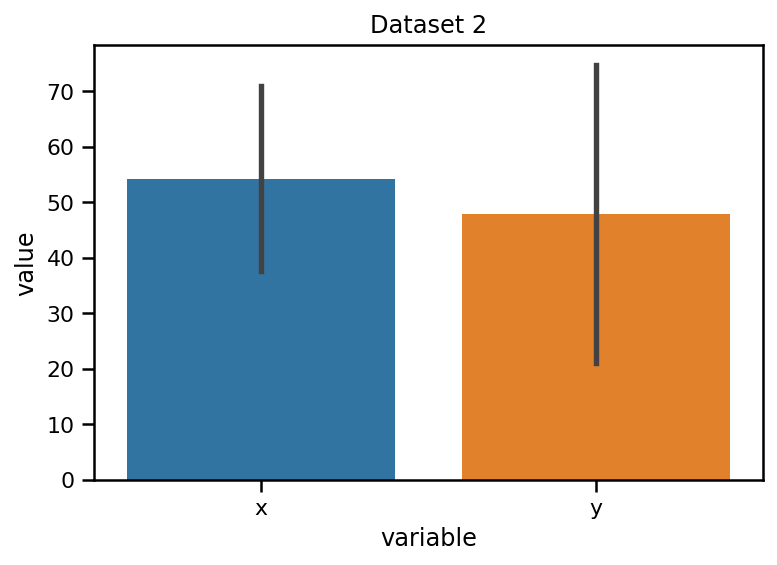

In [8]:
# Do a barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ci="sd")
plt.title("Dataset 2")
plt.show()

#### Compare by looking at the raw data <a class="tocSkip"></a>

They look quite alike, isn't it?

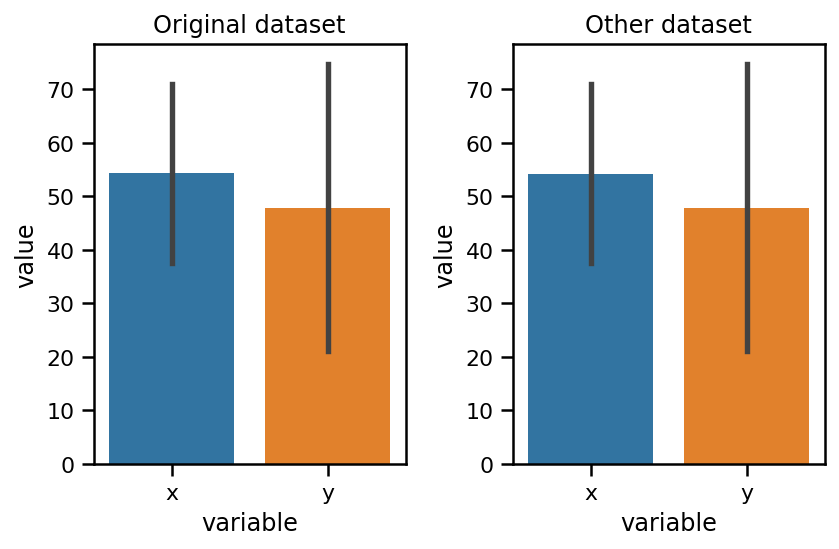

In [9]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2)

# Dot the left barplot
sns.barplot(x="variable", y="value", data=df.melt(), ax=axes[0], ci="sd")
# Set the title
axes[0].set_title("Original dataset")

# Do the right barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ax=axes[1], ci="sd")
# Set the title
axes[1].set_title("Other dataset")

plt.tight_layout()
plt.show()

However...

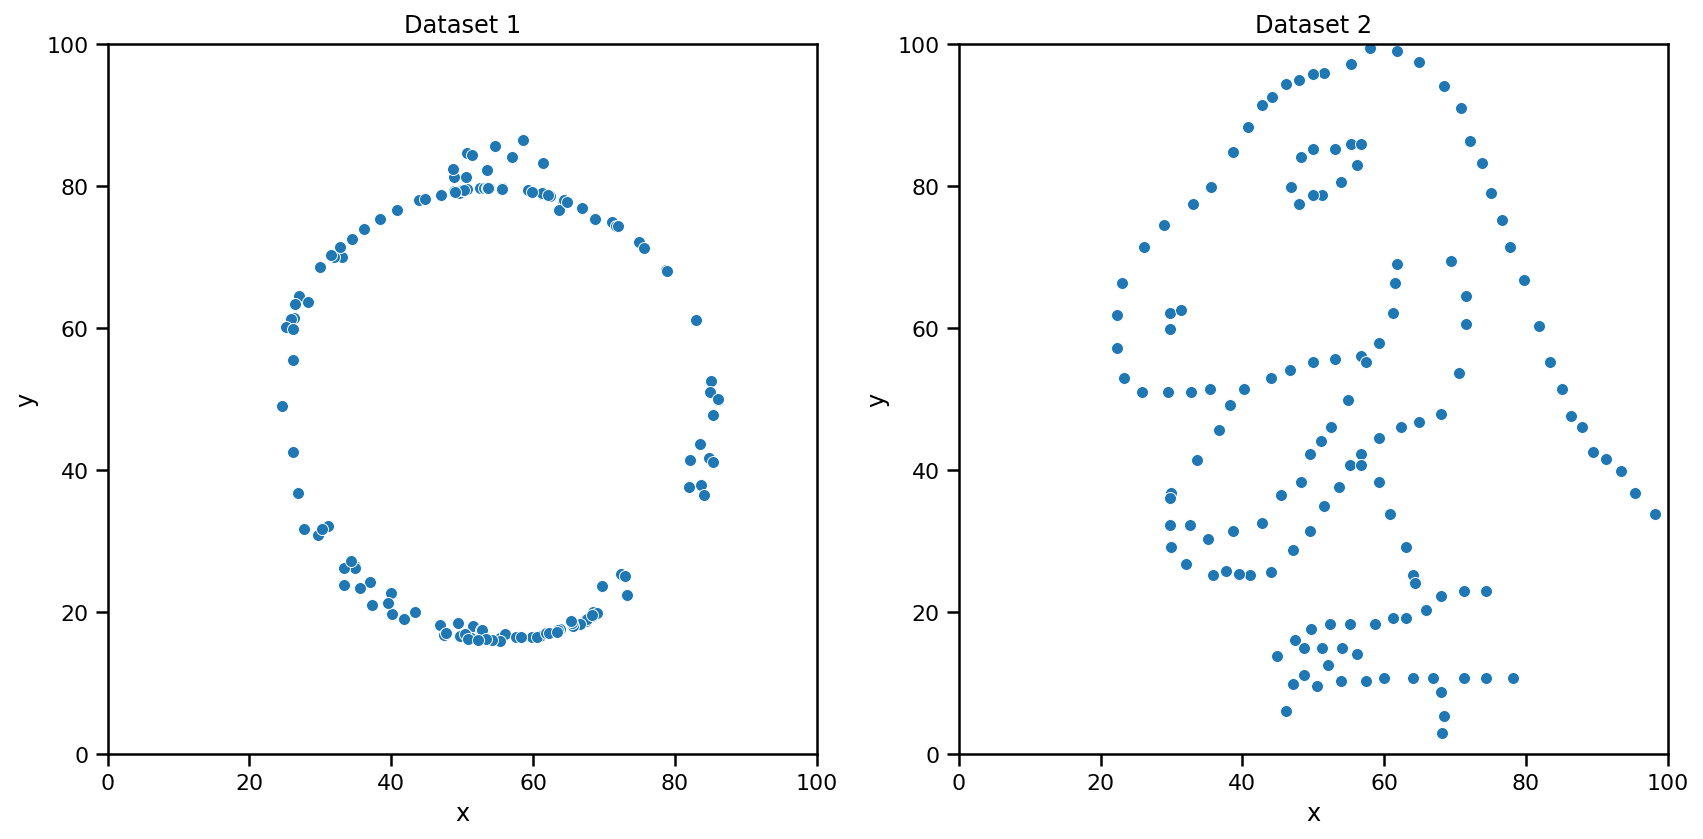

In [10]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(12, 9))


# For both dataset
for i, (label, data) in enumerate((("Dataset 1", df), ("Dataset 2", df_other))):
    
    # Do a scatter plot
    ax = axes[i]
    sns.scatterplot(x="x", y="y", data=data, ax=ax)
    
    # Set the title
    ax.set_title(label)
    
    # Set the limits of the axes
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
    # Make it look square
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

> The descriptive statistics are (almost identical) but the distributions are very different. **Look at your raw data first!**

A few more like this:

<img src="img/same_stats_fig5.png" width="700">

<img src="img/same_stats_fig6.png" width="600">

*Note: you can find a lot of astonishing examples in [Matejka, J., & Fitzmaurice, G. (2017, May). Same stats, different graphs: generating datasets with varied appearance and identical statistics through simulated annealing. In Proceedings of the 2017 CHI Conference on Human Factors in Computing Systems (pp. 1290-1294)](https://www.autodeskresearch.com/publications/samestats).*

# Do give indication of the underlying data distribution

## Remember that dispersion is important to evaluate a difference<a class="tocSkip"></a>

#### Generate data <a class="tocSkip"></a>

In [10]:
# Seed the random number generator
np.random.seed(4)

# Set the parameters
mean_1 = 150.0
mean_2 = 200.0

small_std = 10.0
large_std = 50.0

n = 100

In [11]:
# Create the samples
val1_small_std = np.random.normal(mean_1, scale=large_std, size=n)
val2_small_std = np.random.normal(mean_2, scale=large_std, size=n)

val1_large_std = np.random.normal(mean_1, scale=small_std, size=n)
val2_large_std = np.random.normal(mean_2, scale=small_std, size=n)

# Print a few values
print("val1_small_std (3 first values):", val1_small_std[:3])
print("val2_small_std (3 first values):", val2_small_std[:3])
print("val1_large_std (3 first values):", val1_large_std[:3])
print("val2_large_std (3 first values):", val2_large_std[:3])

val1_small_std (3 first values): [152.52808536 174.99756666 100.20455344]
val2_small_std (3 first values): [236.91235556 232.53766155 230.73703148]
val1_large_std (3 first values): [145.27337184 150.96267944 162.29213395]
val2_large_std (3 first values): [211.9451626  195.01279275 199.19260386]


#### Visualize the distribution <a class="tocSkip"></a>

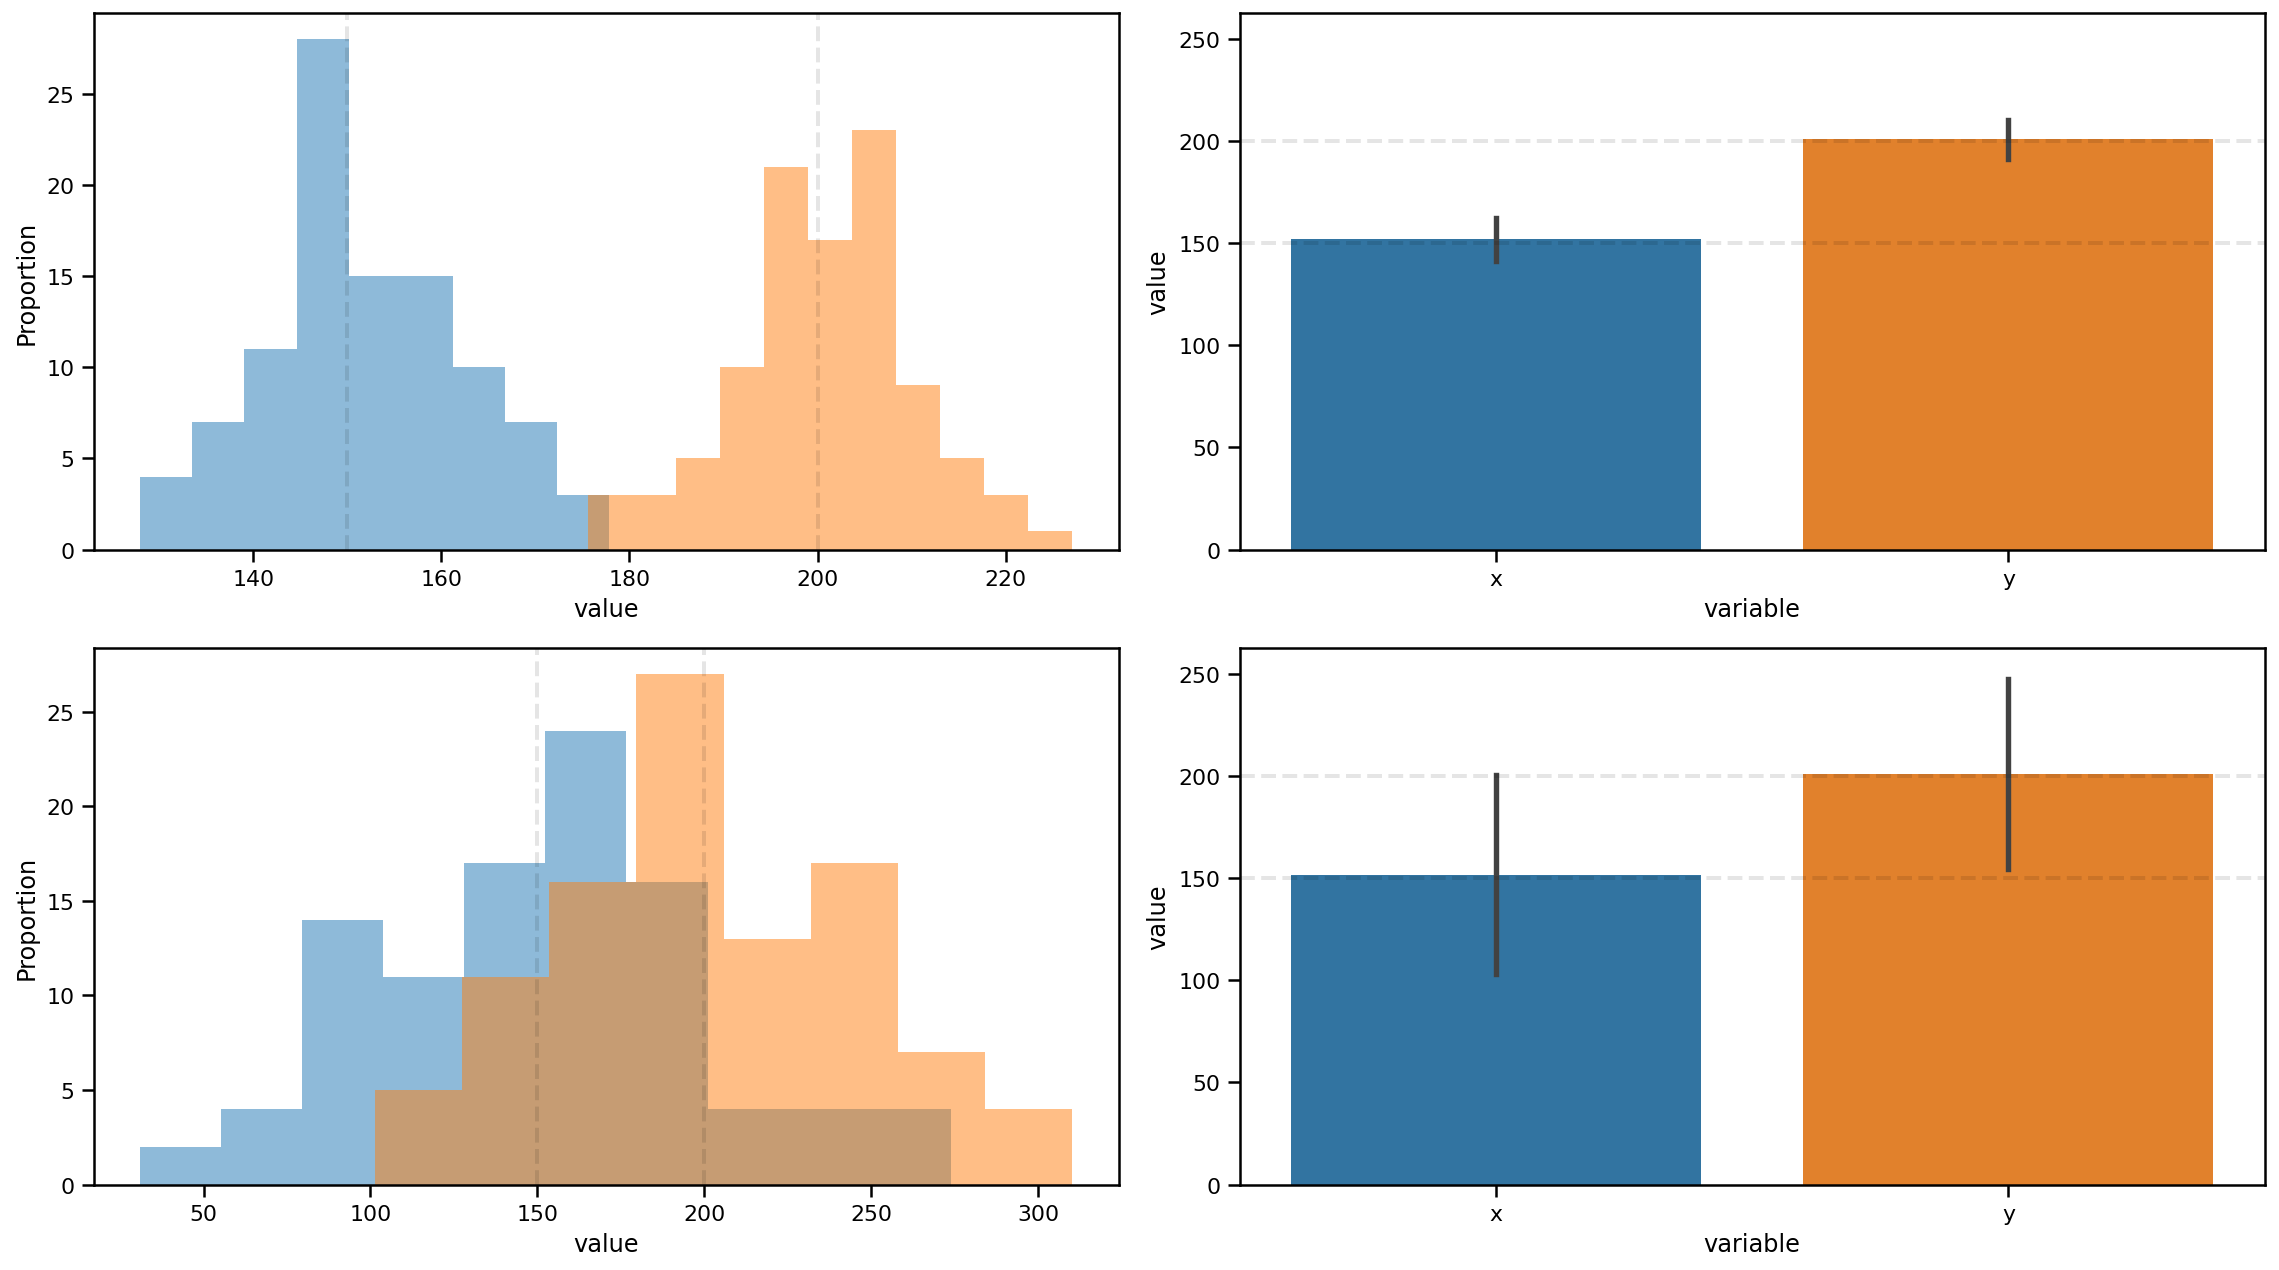

In [12]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

# For each dataset (containing each two samples)
for i, (val1, val2) in enumerate(((val1_large_std, val2_large_std),
                                  (val1_small_std, val2_small_std))):

    # Create histograms
    ax = axes[i, 0]
    sns.histplot(x=val1, ax=ax, color="C0", kde=False, alpha=0.5, lw=0)
    sns.histplot(x=val2, ax=ax, color="C1", kde=False, alpha=0.5, lw=0)
    
    # Plot the theoretical mean
    ax.axvline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axvline(mean_2, ls='--', color='black', alpha=0.1, lw=2)
    
    # Set the axis lables
    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")

    # Create a barplot
    ax = axes[i, 1]
    df = pd.DataFrame({"x": val1, "y": val2}).melt()
    sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")
    
    # Add horizontal lines representing the means
    ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)
    
    # Set the y limits
    ax.set_ylim(0, max(mean_1, mean_2) + large_std * 1.25)

plt.tight_layout()
plt.show()

> The difference of means are identical but the dispersions are different. In one case, it seems adequate to consider that there is a difference between $X$ and $Y$, while it is not that evident in the other. **Always look at the dispersion** (STD/variance)!

## One bad example <a class="tocSkip"></a>

Remember this figure from  the <a href="https://www.nature.com/articles/365611a0"> Mozart effect's paper</a>:

<img src="img/mozart.png" width="300">

# Do NOT trust the default options

Let's use one 'toy' dataset (from <a href="http://sthda.com/english/wiki/r-built-in-data-sets">R built-in datasets</a>).

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Description of variables:

`mpg`: Miles/(US) gallon

`cyl`: Number of cylinders

`disp`: Displacement (cu.in.)

`hp`: Gross horsepower

`drat`: Rear axle ratio

`wt`: Weight (1000 lbs)

`qsec`: 1/4 mile time

`vs`: V/S

`am`: Transmission (0 = automatic, 1 = manual)

`gear`: Number of forward gears

`carb`: Number of carburetors

In [35]:
df = pd.read_csv("data_lec4/mt_cars.csv", index_col=0)
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Let's represent the milage per gallon against the weight for each of the $32$ cars.

## Using Matplotlib defaults

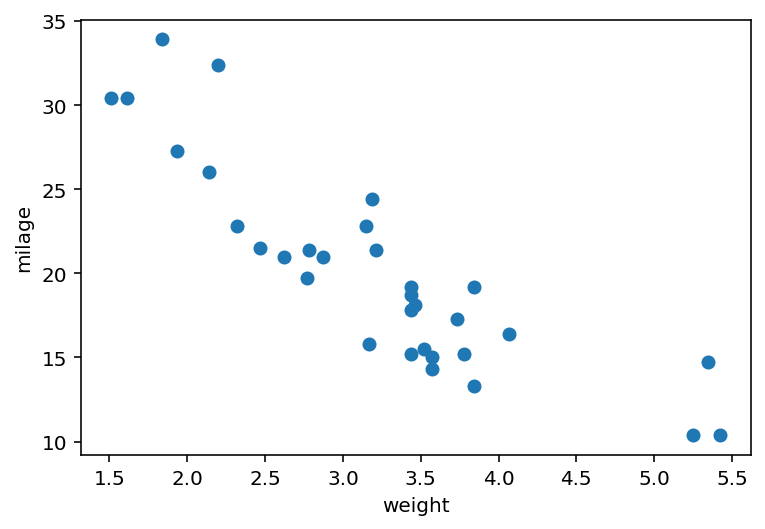

In [38]:
sns.reset_orig()  # Reset to default
fig, ax = plt.subplots()
ax.scatter(df.wt, df.mpg)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

## Using R defaults

<img src="img_lec4/cars_r.png" width="400" align="left">

## Using Matlab defaults

<img src="img_lec4/cars_matlab.png" width="400" align="left">

## Using Excel defaults

<img src="img_lec4/cars_excel.png" width="400" align="left">

## Using Numbers (MacOS) defaults

<img src="img_lec4/cars_numbers.png" width="400" align="left">

## Using Seaborn defaults

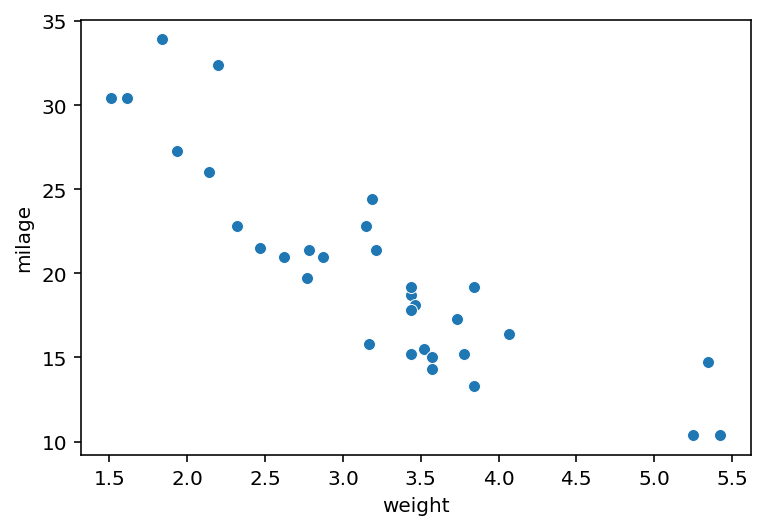

In [46]:
sns.reset_orig()
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

However, Seaborn propose several defaults. The more default of the defaults is by calling 
`sns.set()`

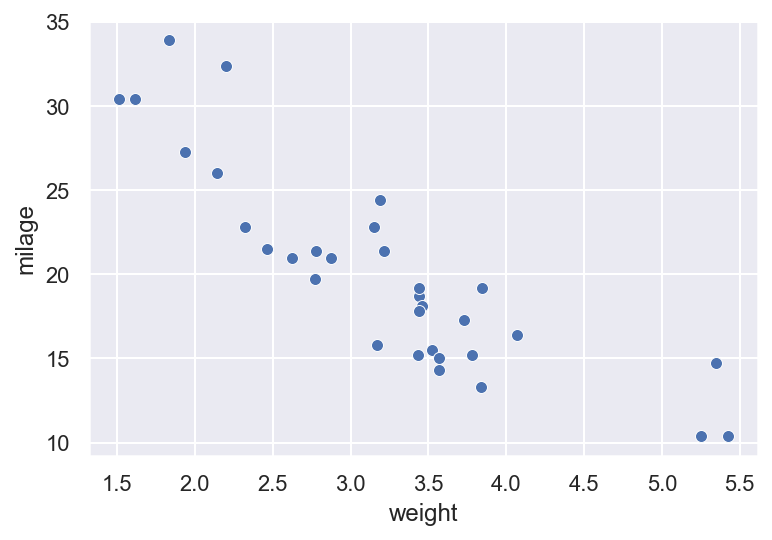

In [48]:
sns.reset_orig()
sns.set()
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

Other 'defaults' can be set by using `sns.set_theme`, choosing a `context` (default is "notebook", alternatives are "paper", "talk", and "poster"), and a `style` (default is "darkgrid", alternatives are "whitegrid", "dark", "white", "ticks").

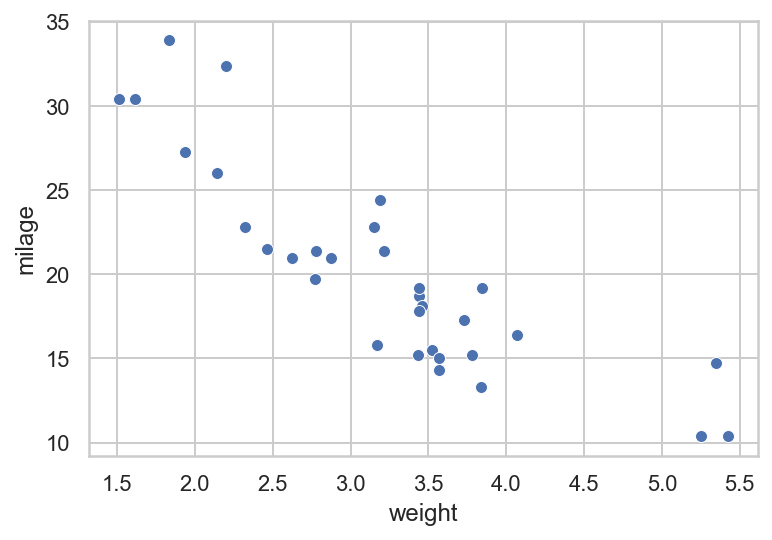

In [50]:
sns.reset_orig()
sns.set_theme(style='whitegrid',)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

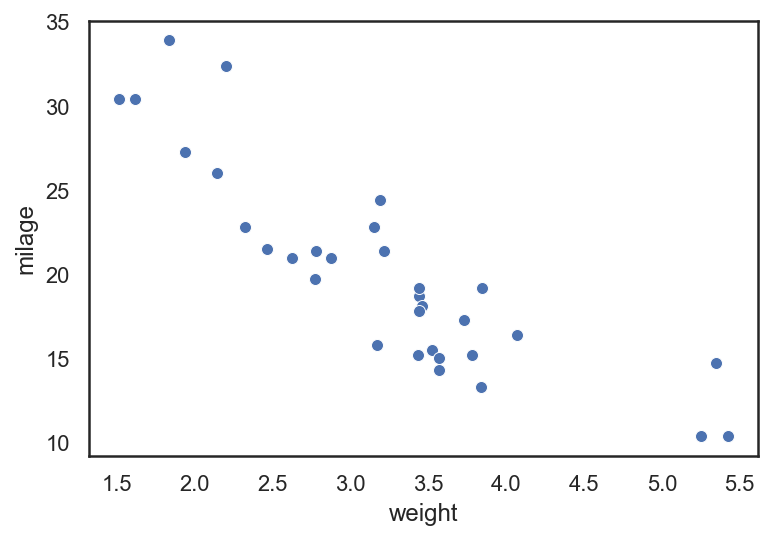

In [51]:
sns.reset_orig()
sns.set_theme(style='white',)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>

Do not trust defaults!
</div>

# Do NOT overload your figures

In [ ]:
# Data
# -----------------------------------------------------------------------------
p, n = 7, 32
X = np.linspace(0,2,n)
Y = np.random.uniform(-.75,.5,(p,n))

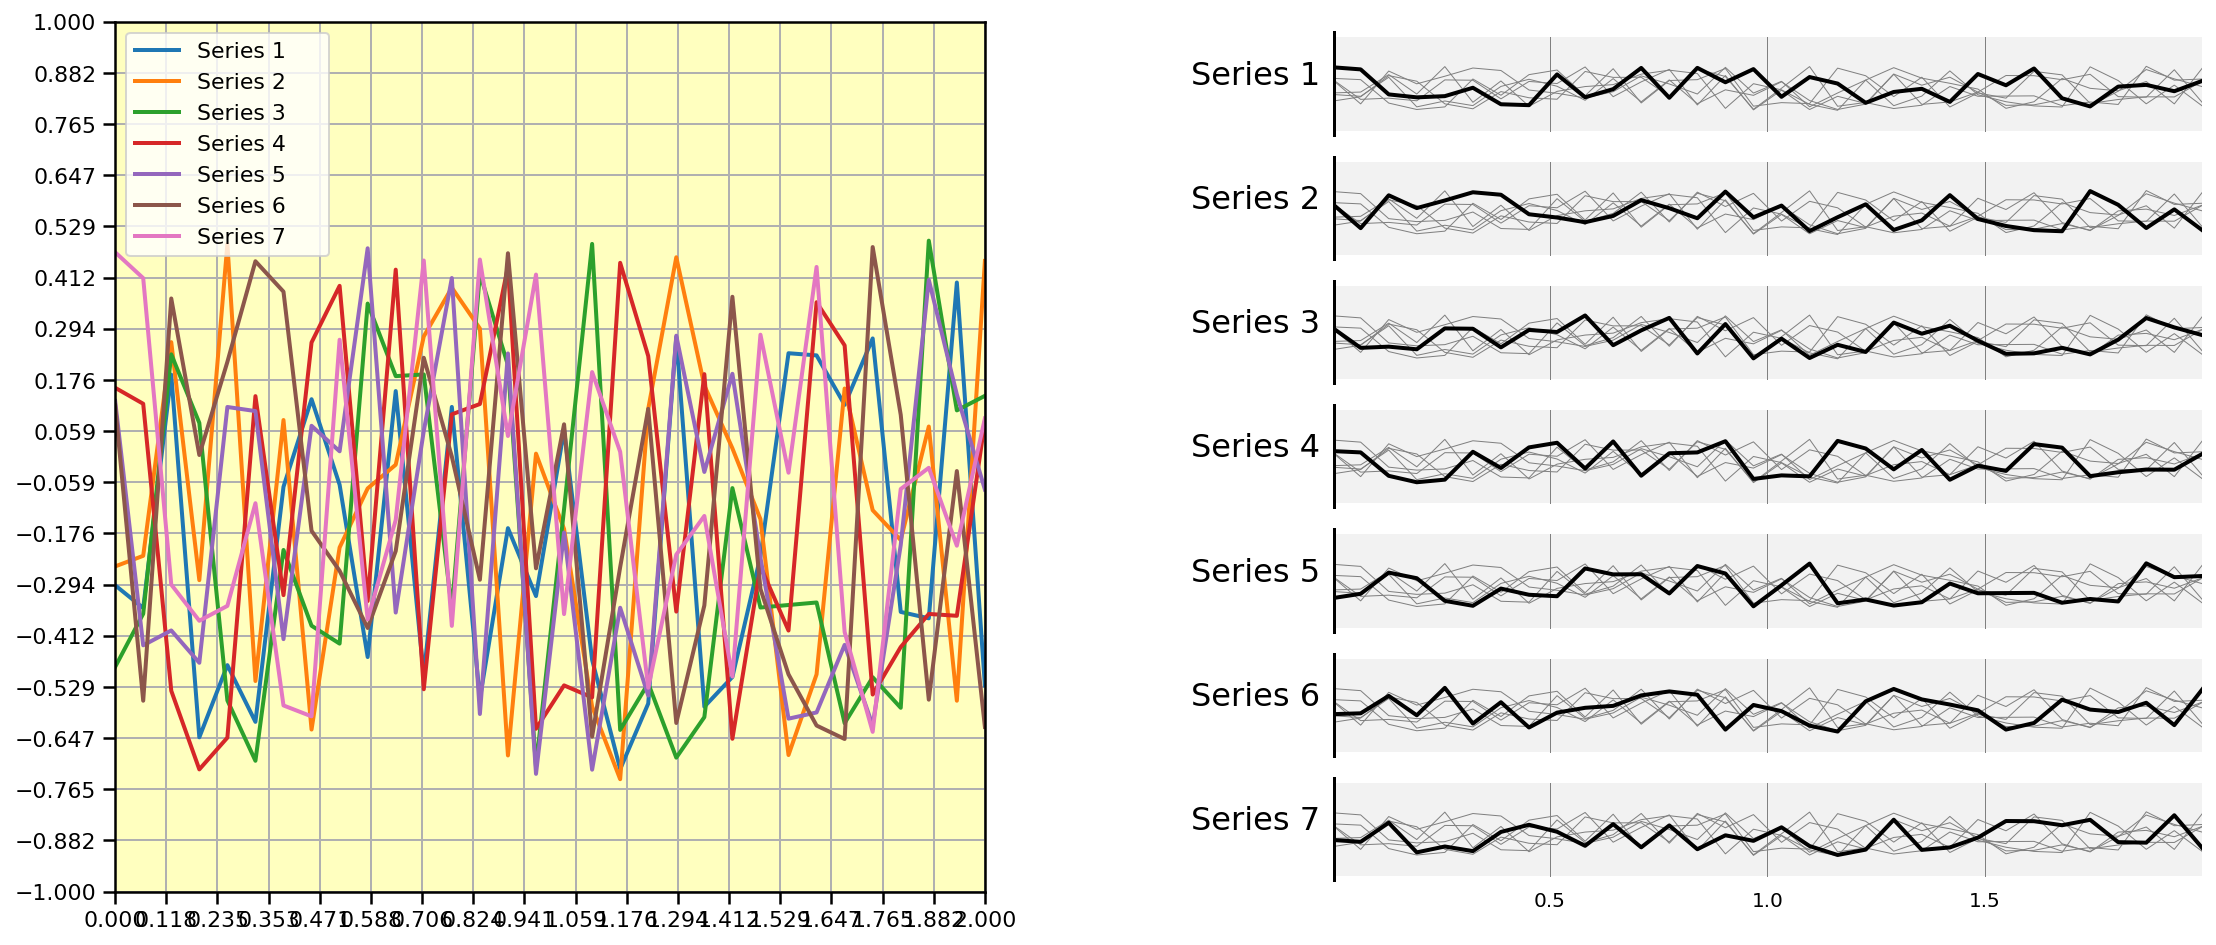

In [12]:


# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(1,2,1, aspect=1)
ax.patch.set_facecolor((1,1,.75))
for i in range(p):
    plt.plot(X, Y[i], label = "Series %d     " % (1+i), lw=2)
plt.xlim( 0,2)
plt.ylim(-1,1)
plt.yticks(np.linspace(-1,1,18))
plt.xticks(np.linspace(0,2,18))
plt.legend()
plt.grid()

# -----------------------------------------------------------------------------
ax = plt.subplot(1,2,2, aspect=1)
Yy = p-(np.arange(p)+0.5)
Xx = [p,]*p
rects = plt.barh(Yy, Xx, align='center', height=0.75, color='.95', ec='None', zorder=-20)
plt.xlim(0,p), plt.ylim(0,p)

for i in range(p):
    label = "Series %d" % (1+i)
    plt.text(-.1, Yy[i], label, ha = "right", fontsize=16)
    plt.axvline(0,   (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='k', lw=3)
    plt.axvline(.25*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.50*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.75*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.plot(X*p/2, i+.5+2*Y[i]/p, c='k', lw=2)
    for j in range(p):
        if i != j:
            plt.plot(X*p/2, i+.5+2*Y[j]/p, c='.5', lw=.5, zorder=-10)
plt.text(.25*p, 0, "0.5", va = "top", ha="center", fontsize=10)
plt.text(.50*p, 0, "1.0", va = "top", ha="center", fontsize=10)
plt.text(.75*p, 0, "1.5", va = "top", ha="center", fontsize=10)
plt.axis('off')
plt.show()

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>

Do not overload your figure
</div>

# Do play with visual properties (color, contrast, width, transparency, etc.)

## Popout effect

You should not ignore the pop out effects. Here are a few examples from Collin Ware's book <a href="https://www.elsevier.com/books/visual-thinking-for-design/ware/978-0-12-370896-0">Visual Thinking for Design</a>, accessible <a href="https://github.com/greenore/cs171-coursework/blob/master/Visual%20Thinking%20for%20Design%20-%20Colin%20Ware.pdf">here</a>.

<img src="img_lec4/popout1.png" width="400">
<img src="img_lec4/popout2.png" width="400">
<img src="img_lec4/popout3.png" width="400">
<img src="img_lec4/popout5.png" width="400">

This can be used to data visualization (example also from *Visual thinking for design*):

<img src="img_lec4/popout4.png" width="600">

# Playing with the contrast

In [89]:
p, n = 7, 32
X = np.linspace(0,2,n)
Y = np.random.uniform(-.75,.5,(p,n))

data = np.concatenate((np.atleast_2d(X), Y), axis=0).T
columns = ["X", ] + [f"Y{i+1}" for i in range(p) ]
df = pd.DataFrame(data=data, columns=columns)
df

,X,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,0.000000,-0.321027,-0.353393,-0.729838,0.308133,-0.186704,0.189555,0.066706
1,0.064516,0.161312,-0.231467,-0.006960,-0.058428,-0.065296,-0.651064,0.495108
2,0.129032,-0.201785,0.332886,-0.054019,0.318066,-0.633342,0.324236,0.211747
3,0.193548,-0.675403,-0.436931,-0.551300,-0.268953,-0.378924,0.276880,-0.032782
4,0.258065,-0.252445,-0.146207,-0.558662,-0.354015,0.409480,0.387340,-0.621706
5,0.322581,0.172494,0.481950,0.119412,-0.307169,-0.038745,-0.589211,0.124793
6,0.387097,-0.521885,-0.100644,-0.351542,-0.536148,-0.178235,-0.647775,0.076460
7,0.451613,-0.530685,0.016118,0.114963,0.286391,0.191907,-0.576981,-0.688629
8,0.516129,-0.085561,-0.599214,-0.057021,-0.326661,0.177328,-0.250777,0.240374
9,0.580645,-0.085216,0.282926,-0.263812,-0.059537,-0.689276,-0.219616,-0.101604


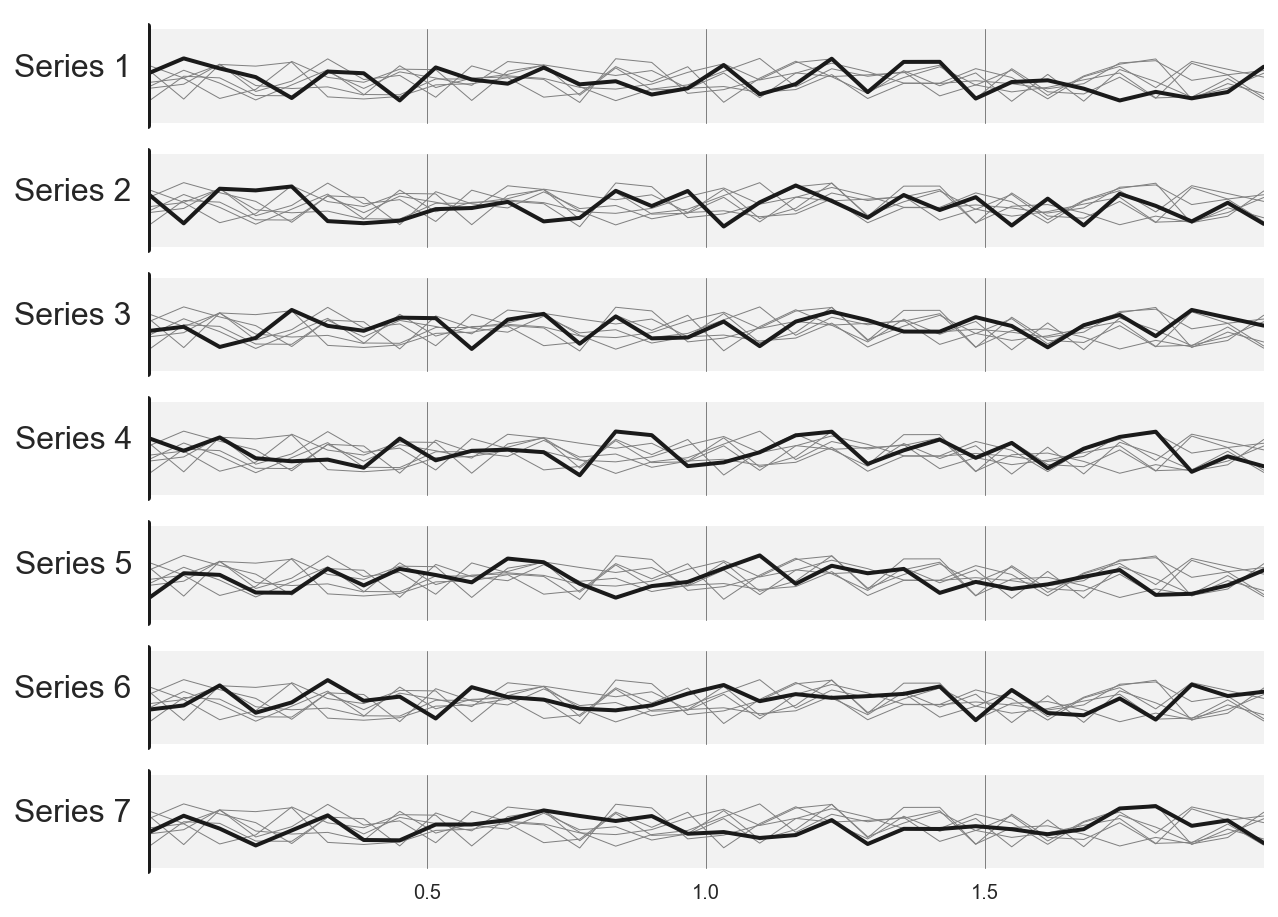

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
Yy = p-(np.arange(p)+0.5)
Xx = [p,]*p
rects = plt.barh(Yy, Xx, align='center', height=0.75, color='.95', ec='None', zorder=-20)
plt.xlim(0,p), plt.ylim(0,p)

for i in range(p):
    label = "Series %d" % (1+i)
    plt.text(-.1, Yy[i], label, ha = "right", fontsize=16)
    plt.axvline(0,   (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='k', lw=3)
    plt.axvline(.25*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.50*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.75*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.plot(X*p/2, i+.5+2*Y[i]/p, c='k', lw=2)
    for j in range(p):
        if i != j:
            plt.plot(X*p/2, i+.5+2*Y[j]/p, c='.5', lw=.5, zorder=-10)
plt.text(.25*p, 0, "0.5", va = "top", ha="center", fontsize=10)
plt.text(.50*p, 0, "1.0", va = "top", ha="center", fontsize=10)
plt.text(.75*p, 0, "1.5", va = "top", ha="center", fontsize=10)
plt.axis('off')
plt.show()

The plot above exploits the contrast properties while the plot below does not (while still trying to give him justice by removing part of the overload).

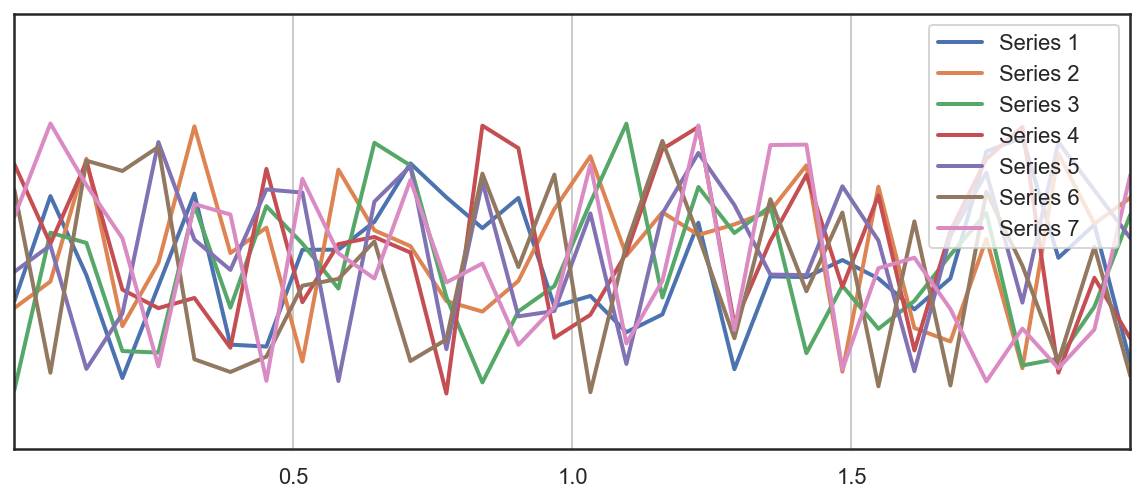

In [91]:
fig, ax = plt.subplots(figsize=(10,4))

for i in range(p):
    plt.plot(X, Y[i], label = "Series %d     " % (1+i), lw=2)
plt.xlim( 0,2)
plt.ylim(-1,1)
ax.set_xticks([0.5, 1.00, 1.50])
ax.set_yticks([])

plt.legend()
plt.grid()

# Adapt the type of figure to the type of comparison/relation you aim to show

## (Bad) Example: Using boxplot for showing distribution

### Penguins flipper length

In [87]:
penguins = sns.load_dataset("penguins")
print(penguins.flipper_length_mm)

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64


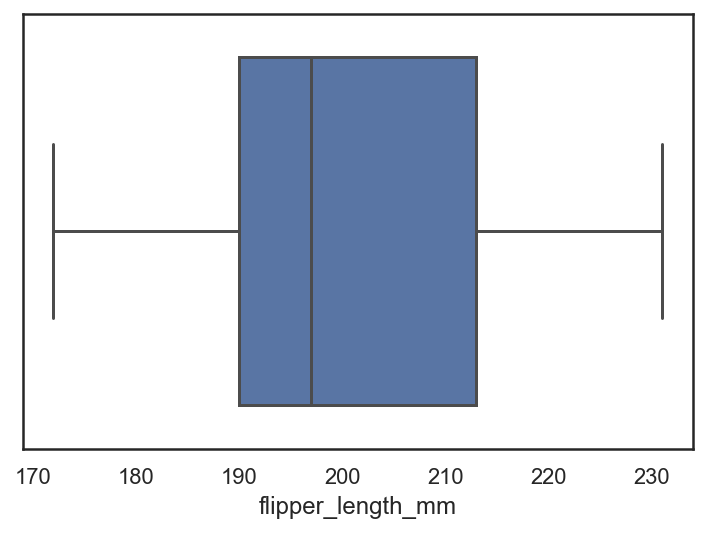

In [142]:
sns.boxplot(data=penguins, x="flipper_length_mm");

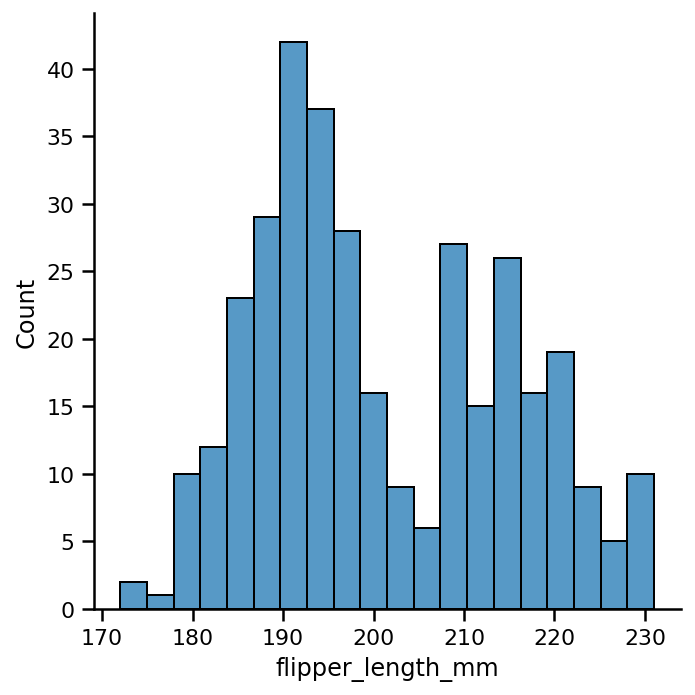

In [18]:
sns.displot(penguins, x="flipper_length_mm", bins=20);

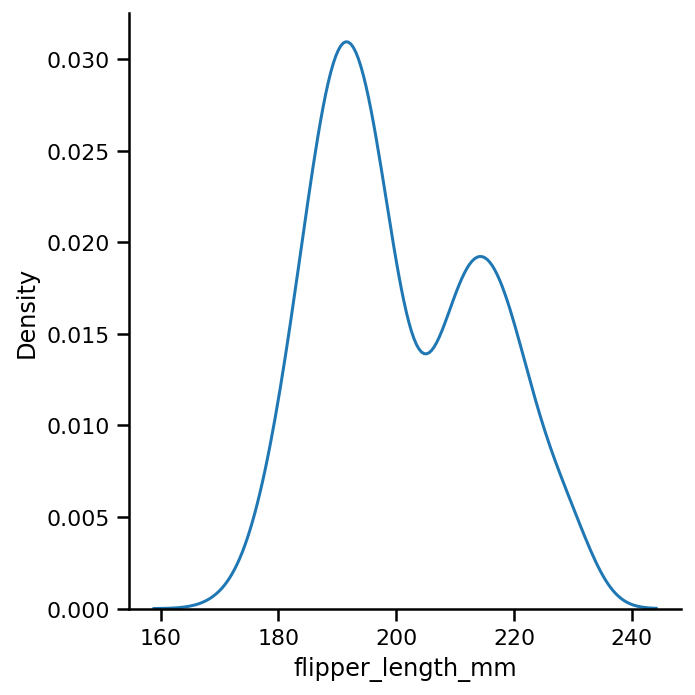

In [19]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");

### Salaries

Data from <a href="https://catalog.data.gov/ro/dataset/annual-salary-2010-thru-2013">data.gov</a> (U.S. General Services Administration)

In [108]:
df = pd.read_csv("data_lec4/Annual_Salary_2010_thru_2013.csv")
df

,Agency,AgencyTitle,EmployeeName,JobTitle,Salary2010,Salary2011,Salary2012,Salary2013
0,165,Accountancy,"ASMATH, MOSAR",FORMS & RECORDS ANALYST 2,0,0,0,32272
1,165,Accountancy,"AUBREY, DONALD F",BOARD MEMBER,0,950,1450,0
2,165,Accountancy,"BREN, DIANE MARIE",WMS BAND 3,15004,0,0,0
3,165,Accountancy,"CLARK, ROBIN",BOARD MEMBER,550,0,0,0
4,165,Accountancy,"DONOVAN, KIRSTEN M",ADMINISTRATIVE TRAINEE 3,0,0,0,15182
...,...,...,...,...,...,...,...,...
339758,691,Yakima Valley College,"WRIGHT, TERRY D",FACULTY,5706,17118,15692,12839
339759,691,Yakima Valley College,"YBARRA, TOMAS",VICE PRES-INSTR & STU SERV,100989,99601,97960,100506
339760,691,Yakima Valley College,"YOLO, LAURA JEAN",PROGRAM COORDINATOR,0,0,0,29531
339761,691,Yakima Valley College,"ZAVALA, DIANN CHRISTINE",FACULTY,6340,3804,0,0


In [132]:
# Don't take into account the zeros that seems to stand for 'missing value'
df=df[df.Salary2013 > 0]

<AxesSubplot:xlabel='Salary2013'>

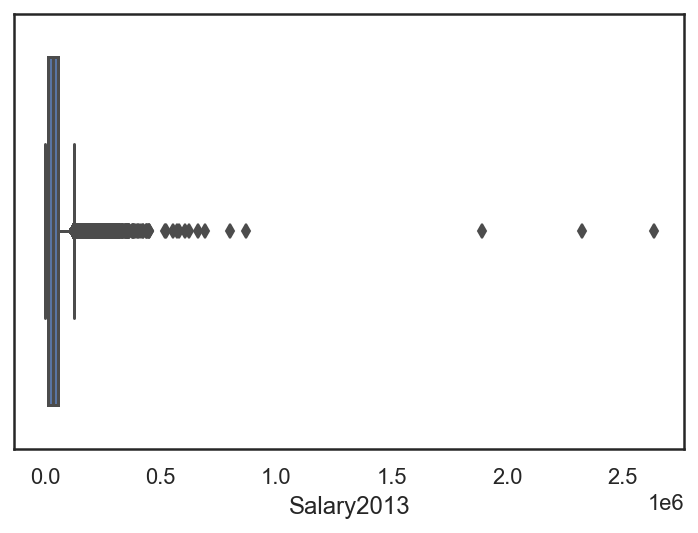

In [133]:
sns.boxplot(data=df, x="Salary2013")

(20.0, 150000.0)

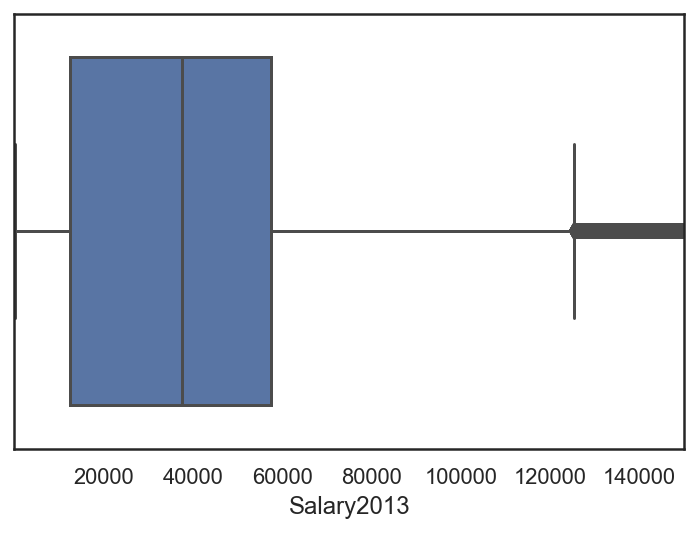

In [139]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="Salary2013", ax=ax)
ax.set_xlim(20, 150000)

(100.0, 100000.0)

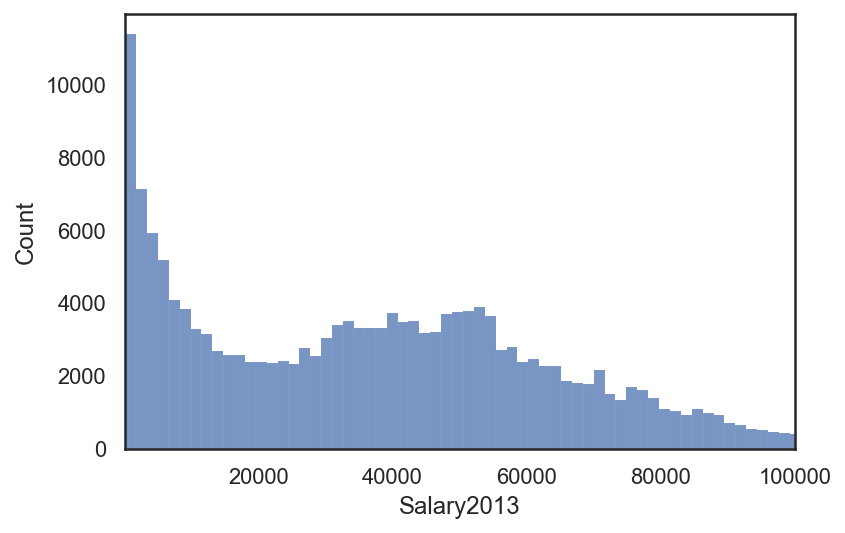

In [129]:
fig, ax = plt.subplots()
sns.histplot(df.Salary2013[df.Salary2013 > 0], ax=ax)
ax.set_xlim(100, 100000)

The box plot hides the distribution shape, and gives the wrong impression that salaries are centered around the median.

# Everything is relative... up to some point

In [140]:
n = 20
Z = np.linspace(0,1,n*n).reshape(n,n)
Z = (Z-Z.min())/(Z.max()-Z.min())
Z += np.random.uniform(0,1,(n,n))

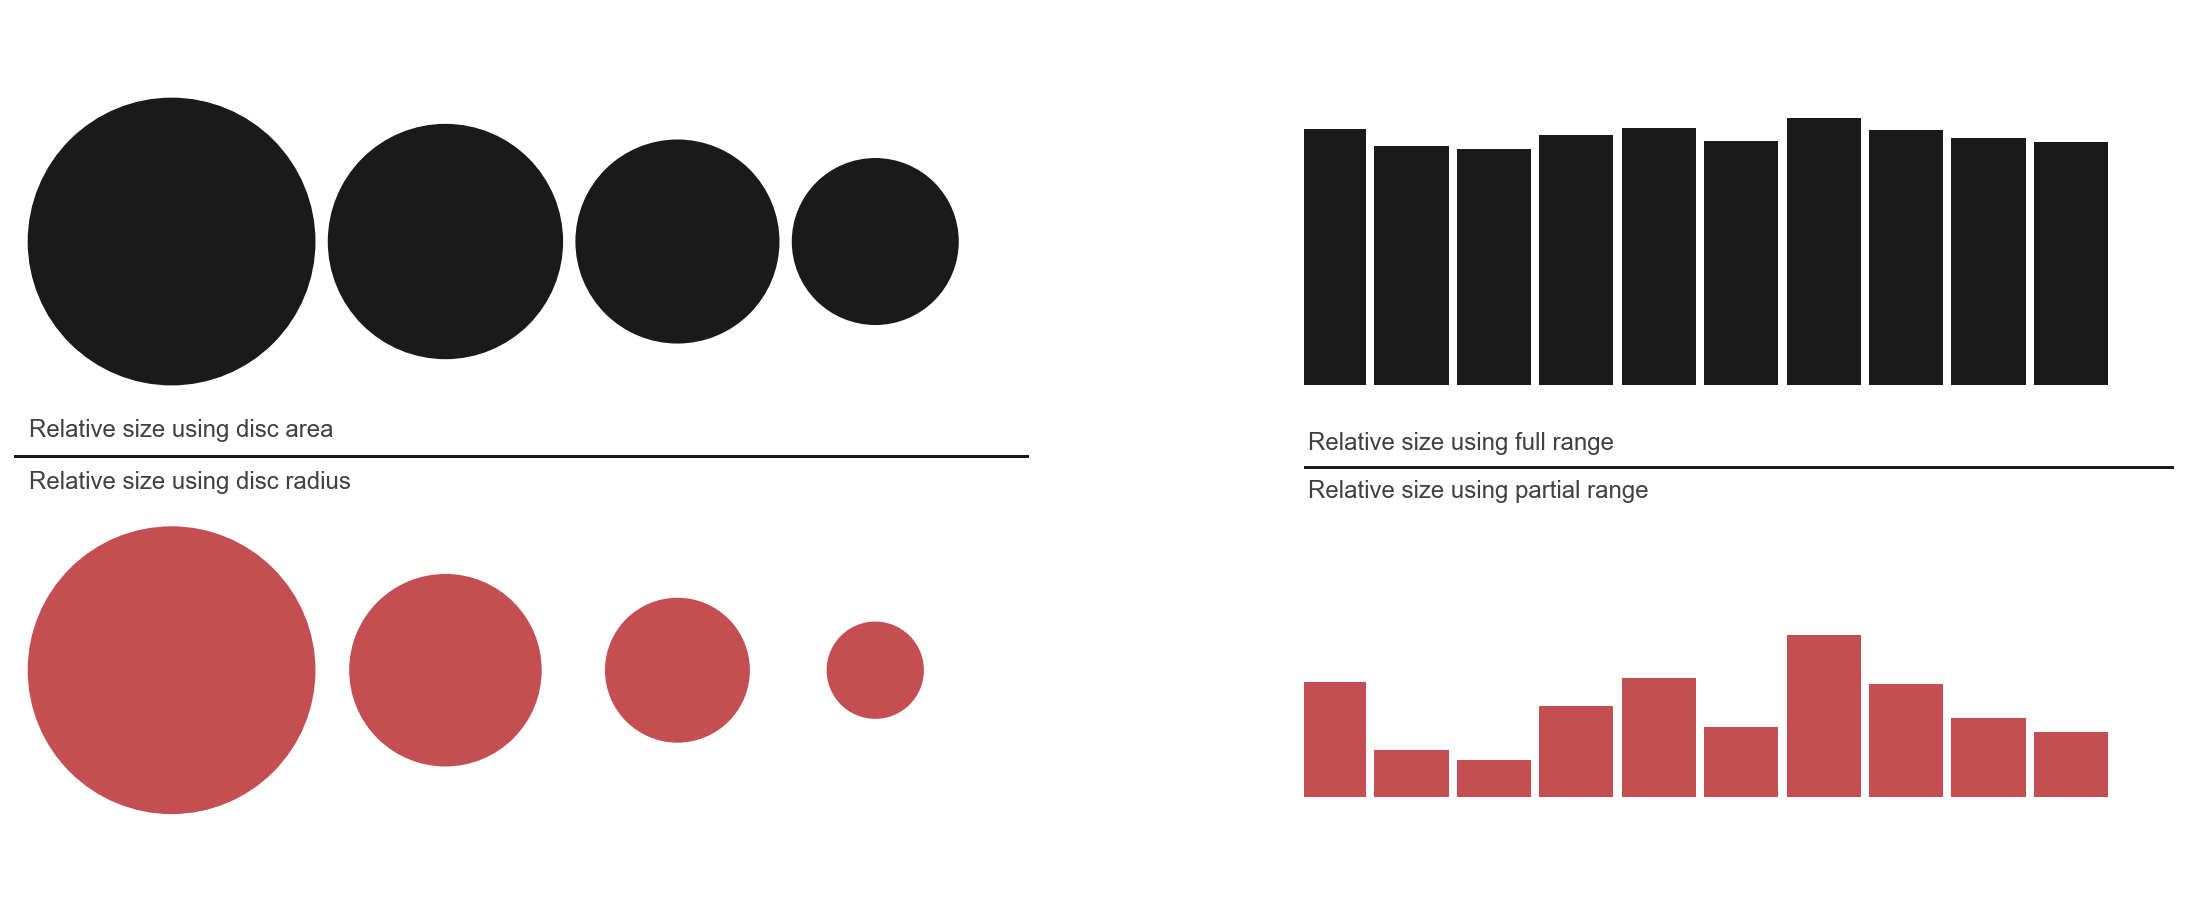

In [88]:
plt.figure(figsize=(20,8))

ax = plt.subplot(1,2,1, aspect=1)
values = [30.,20.,15.,10.]
x, y = 0.0, 0.5
for value in values:
    r1 = .5* (value / values[0])
    r2 = .5* ((np.sqrt(value/np.pi))/(np.sqrt(values[0]/np.pi)))
    ax.add_artist(plt.Circle( (x+r2,y), r1, color='r'))
    ax.add_artist(plt.Circle( (x+r2,1.5+y), r2, color='k'))
    fontsize = 2*value
    x += 2*r2 + 0.05
plt.axhline(1.25, c='k')
plt.text(0.0, 1.25+0.05, "Relative size using disc area",
         ha="left", va="bottom",color=".25")
plt.text(0.0, 1.25-0.05, "Relative size using disc radius",
         ha="left", va="top",color=".25")
plt.xlim(-0.05, 3.5)
plt.ylim(-0.05, 2.6)
plt.axis('off')


ax = plt.subplot(1,2,2, aspect=1)

plt.axhline(5, c='k')
plt.text(0.0, 5+0.15, "Relative size using full range",
         ha="left", va="bottom",color=".25")
plt.text(0.0, 5-0.15, "Relative size using partial range",
         ha="left", va="top",color=".25")


n = 10
np.random.seed(123)
X = 0.25+np.arange(n)
Y = 2+np.random.uniform(.75,.85,n)

plt.bar(X, 5*(Y-2.2), .9, color='k', ec='None',bottom=6)
plt.bar(X, 20*(Y-2.75), .9, color='r', ec='None',bottom=1)

plt.xlim(-0.05, 10.5)
plt.ylim(-0.05, 10.5)
plt.axis('off')

plt.savefig("figure-6.pdf")
plt.show()

# Recommended reading

<a href="https://dl.acm.org/doi/pdf/10.1145/1743546.1743567">Heer et al. (2010)</a>

<a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a>

# Dataset <a class="tocSkip"></a>

<a href="https://data.world/">data.world</a> has a nice API. Price to pay is that you need to login.

In [99]:
import datadotworld as dw
results = dw.query(
	'chhs/ca-living-wage', 
    'SELECT * FROM living_wage')
results_df = results.dataframe

In [100]:
results_df

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,families,pct_lt_lw,ll_95ci,ul_95ci,se,rse,family_type_decile,ca_rr,livingwage,version
0,770,Living wage and percent of families with incom...,2010,1.0,AIAN,CA,6,California,None,NaN,...,9509.0,26.6,NA,NA,NA,NA,None,1.06,22.15,2013-09-29
1,770,Living wage and percent of families with incom...,2010,2.0,Asian,CA,6,California,None,NaN,...,452847.0,18.0,NA,NA,NA,NA,None,0.72,22.15,2013-09-29
2,770,Living wage and percent of families with incom...,2010,3.0,AfricanAm,CA,6,California,None,NaN,...,100319.0,20.3,NA,NA,NA,NA,None,0.81,22.15,2013-09-29
3,770,Living wage and percent of families with incom...,2010,4.0,Latino,CA,6,California,None,NaN,...,1156849.0,42.4,NA,NA,NA,NA,None,1.70,22.15,2013-09-29
4,770,Living wage and percent of families with incom...,2010,5.0,NHOPI,CA,6,California,None,NaN,...,10732.0,20.0,NA,NA,NA,NA,None,0.80,22.15,2013-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15864,770,Living wage and percent of families with incom...,2010,NaN,None,PL,87056,Yucca Valley town,San Bernardino,6071.0,...,NaN,NaN,NA,NA,NA,NA,None,NaN,20.67,2013-09-29
15865,770,Living wage and percent of families with incom...,2010,NaN,None,PL,87056,Yucca Valley town,San Bernardino,6071.0,...,NaN,NaN,NA,NA,NA,NA,None,NaN,25.43,2013-09-29
15866,770,Living wage and percent of families with incom...,2010,NaN,None,PL,87056,Yucca Valley town,San Bernardino,6071.0,...,NaN,NaN,NA,NA,NA,NA,None,NaN,24.85,2013-09-29
15867,770,Living wage and percent of families with incom...,2010,NaN,None,PL,87056,Yucca Valley town,San Bernardino,6071.0,...,NaN,NaN,NA,NA,NA,NA,None,NaN,20.67,2013-09-29


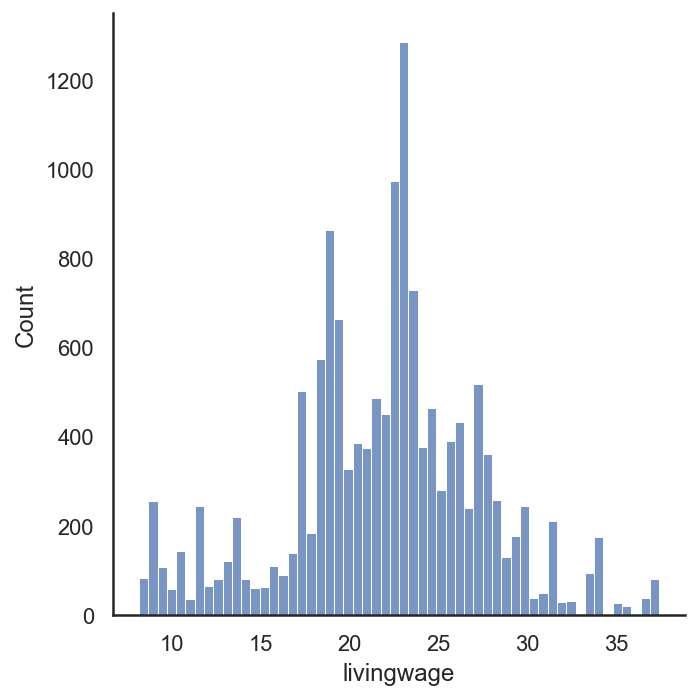

In [101]:
sns.displot(results_df.livingwage)

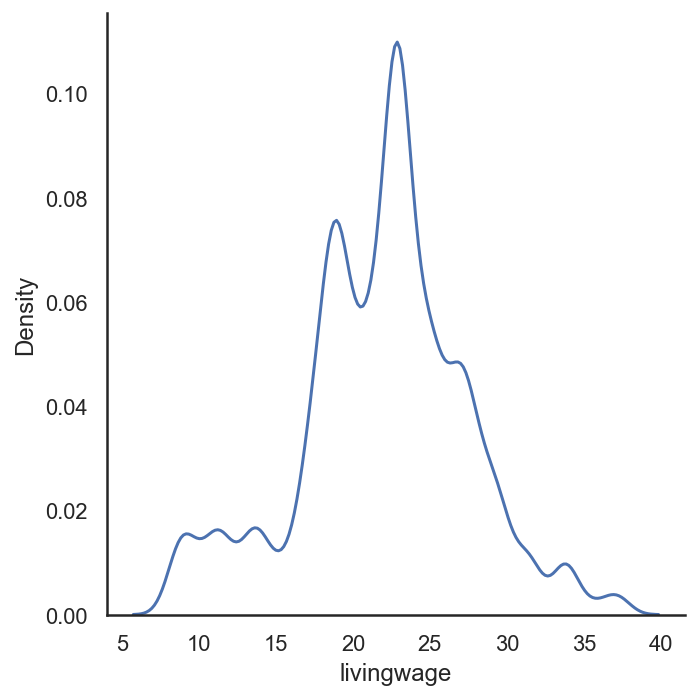

In [104]:
sns.displot(results_df.livingwage, kind="kde")

<AxesSubplot:xlabel='livingwage'>

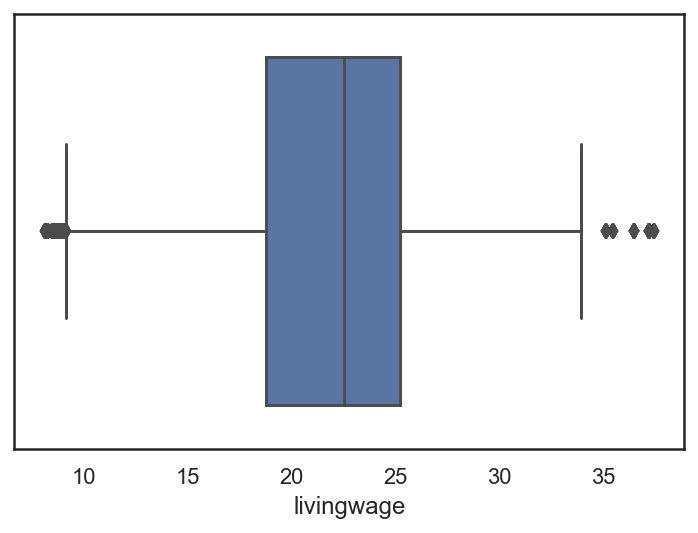

In [103]:
sns.boxplot(data=results_df, x="livingwage")